<a href="https://colab.research.google.com/github/Zahra203/Phishing-Detection/blob/main/train_website_model_py.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from IPython import get_ipython
from IPython.display import display

In [ ]:
import pandas as pd
from google.colab import files
uploaded = files.upload()





Saving dataset_phishing.csv to dataset_phishing.csv


In [ ]:
# Assuming only one file was uploaded, get the filename
for fn in uploaded.keys():
  filename = fn

# Read the uploaded file into a pandas DataFrame
# Replace 'pd.read_csv' with the appropriate function based on your file type
df = pd.read_csv(filename)


In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11430 entries, 0 to 11429
Data columns (total 89 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   url                         11430 non-null  object 
 1   length_url                  11430 non-null  int64  
 2   length_hostname             11430 non-null  int64  
 3   ip                          11430 non-null  int64  
 4   nb_dots                     11430 non-null  int64  
 5   nb_hyphens                  11430 non-null  int64  
 6   nb_at                       11430 non-null  int64  
 7   nb_qm                       11430 non-null  int64  
 8   nb_and                      11430 non-null  int64  
 9   nb_or                       11430 non-null  int64  
 10  nb_eq                       11430 non-null  int64  
 11  nb_underscore               11430 non-null  int64  
 12  nb_tilde                    11430 non-null  int64  
 13  nb_percent                  114

In [ ]:
print(df.head())

                                                 url  length_url  \
0              http://www.crestonwood.com/router.php          37   
1  http://shadetreetechnology.com/V4/validation/a...          77   
2  https://support-appleld.com.secureupdate.duila...         126   
3                                 http://rgipt.ac.in          18   
4  http://www.iracing.com/tracks/gateway-motorspo...          55   

   length_hostname  ip  nb_dots  nb_hyphens  nb_at  nb_qm  nb_and  nb_or  ...  \
0               19   0        3           0      0      0       0      0  ...   
1               23   1        1           0      0      0       0      0  ...   
2               50   1        4           1      0      1       2      0  ...   
3               11   0        2           0      0      0       0      0  ...   
4               15   0        2           2      0      0       0      0  ...   

   domain_in_title  domain_with_copyright  whois_registered_domain  \
0                0                

In [ ]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
print("Missing values per column:\n", df.isnull().sum())

Missing values per column:
 length_url         0
length_hostname    0
ip                 0
nb_dots            0
nb_hyphens         0
                  ..
web_traffic        0
dns_record         0
google_index       0
page_rank          0
status             0
Length: 88, dtype: int64


In [ ]:
df['status'] = df['status'].map({'phishing': 1, 'legitimate': 0})

In [ ]:
# Print the list of columns in the DataFrame to check the exact column name
print(df.columns)

# Once you have the correct column name (e.g., 'Url' or similar),
# replace 'url' in the drop function with the correct name.
# For example, if the column name is 'Url', change the line to:
# df = df.drop(columns=['Url'])

# Assuming the column is indeed missing or was already dropped,
# you can add an error handling mechanism to prevent the script from crashing
# or check if the column exists before attempting to drop it.

if 'url' in df.columns:
    df = df.drop(columns=['url'])
elif 'Url' in df.columns: # Example: check for a different casing
    df = df.drop(columns=['Url'])
else:
    print("Column 'url' or 'Url' not found in the DataFrame.")
    # You might want to handle this case, e.g., log a warning,
    # or decide not to drop any column if it's not present.

feature_names = df.columns.tolist()

# Pretty print the list


Index(['length_url', 'length_hostname', 'ip', 'nb_dots', 'nb_hyphens', 'nb_at',
       'nb_qm', 'nb_and', 'nb_or', 'nb_eq', 'nb_underscore', 'nb_tilde',
       'nb_percent', 'nb_slash', 'nb_star', 'nb_colon', 'nb_comma',
       'nb_semicolumn', 'nb_dollar', 'nb_space', 'nb_www', 'nb_com',
       'nb_dslash', 'http_in_path', 'https_token', 'ratio_digits_url',
       'ratio_digits_host', 'punycode', 'port', 'tld_in_path',
       'tld_in_subdomain', 'abnormal_subdomain', 'nb_subdomains',
       'prefix_suffix', 'random_domain', 'shortening_service',
       'path_extension', 'nb_redirection', 'nb_external_redirection',
       'length_words_raw', 'char_repeat', 'shortest_words_raw',
       'shortest_word_host', 'shortest_word_path', 'longest_words_raw',
       'longest_word_host', 'longest_word_path', 'avg_words_raw',
       'avg_word_host', 'avg_word_path', 'phish_hints', 'domain_in_brand',
       'brand_in_subdomain', 'brand_in_path', 'suspecious_tld',
       'statistical_report', 'nb_hyp

In [ ]:
print(feature_names)

['length_url', 'length_hostname', 'ip', 'nb_dots', 'nb_hyphens', 'nb_at', 'nb_qm', 'nb_and', 'nb_or', 'nb_eq', 'nb_underscore', 'nb_tilde', 'nb_percent', 'nb_slash', 'nb_star', 'nb_colon', 'nb_comma', 'nb_semicolumn', 'nb_dollar', 'nb_space', 'nb_www', 'nb_com', 'nb_dslash', 'http_in_path', 'https_token', 'ratio_digits_url', 'ratio_digits_host', 'punycode', 'port', 'tld_in_path', 'tld_in_subdomain', 'abnormal_subdomain', 'nb_subdomains', 'prefix_suffix', 'random_domain', 'shortening_service', 'path_extension', 'nb_redirection', 'nb_external_redirection', 'length_words_raw', 'char_repeat', 'shortest_words_raw', 'shortest_word_host', 'shortest_word_path', 'longest_words_raw', 'longest_word_host', 'longest_word_path', 'avg_words_raw', 'avg_word_host', 'avg_word_path', 'phish_hints', 'domain_in_brand', 'brand_in_subdomain', 'brand_in_path', 'suspecious_tld', 'statistical_report', 'nb_hyperlinks', 'ratio_intHyperlinks', 'ratio_extHyperlinks', 'ratio_nullHyperlinks', 'nb_extCSS', 'ratio_intR

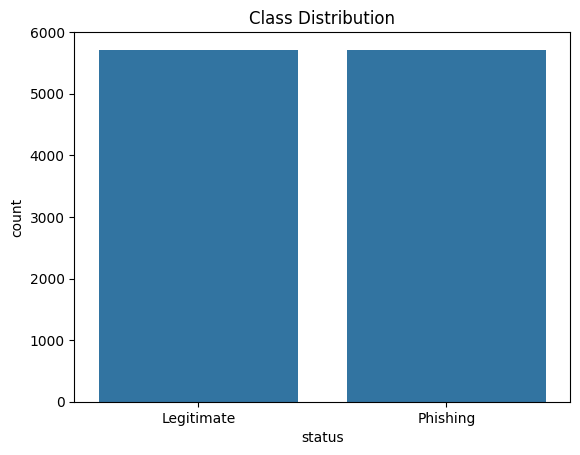

In [ ]:


# Visualize class distribution
sns.countplot(x='status', data=df)
plt.title('Class Distribution')
plt.xticks([0, 1], ['Legitimate', 'Phishing'])
plt.show()

In [ ]:
import pandas as pd
from google.colab import files
uploaded = files.upload()

# Assuming only one file was uploaded, get the filename
for fn in uploaded.keys():
  filename = fn

# Read the uploaded file into a pandas DataFrame
# Replace 'pd.read_csv' with the appropriate function based on your file type
df = pd.read_csv(filename)

Saving dataset_phishing.csv to dataset_phishing.csv


In [ ]:
X = df.drop(columns=['url', 'status'])
y = df['status']



In [ ]:
from sklearn.model_selection import train_test_split  # Import train_test_split here
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
import joblib
# Train the model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X, y)

# Save the model
joblib.dump(model, "random_forest_phishing_model_websites.joblib")

print("✅ Model trained and saved as 'random_forest_phishing_model_websites.joblib'")


✅ Model trained and saved as 'random_forest_phishing_model_websites.joblib'


In [ ]:
y_pred = model.predict(X_test)

In [ ]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9593175853018373

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.95      0.96      1143
           1       0.95      0.96      0.96      1143

    accuracy                           0.96      2286
   macro avg       0.96      0.96      0.96      2286
weighted avg       0.96      0.96      0.96      2286



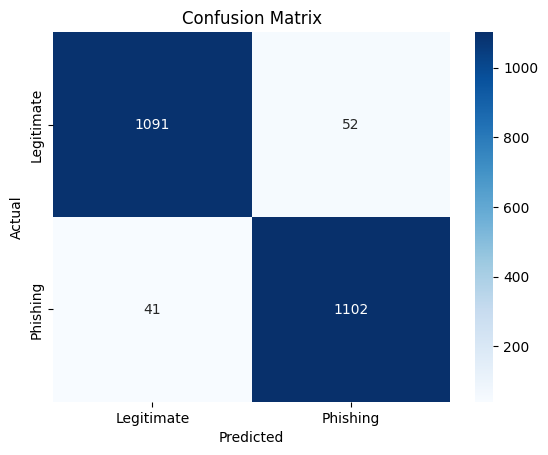

In [ ]:
conf_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Legitimate', 'Phishing'],
            yticklabels=['Legitimate', 'Phishing'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

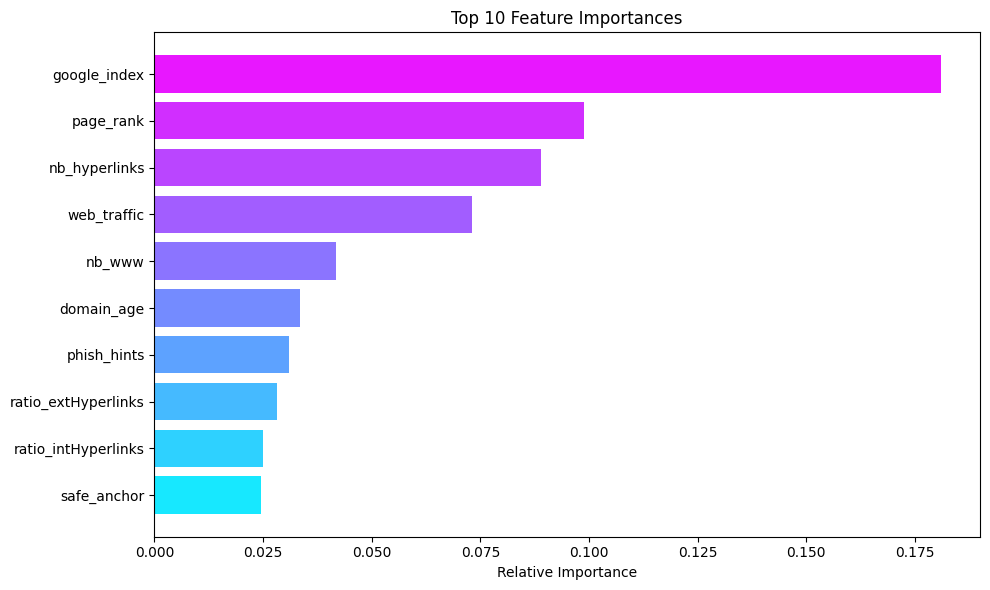

In [ ]:
# Feature importance (Cool-colored plot)
importances = model.feature_importances_
features = X.columns
indices = np.argsort(importances)[-10:]  # Top 10 features

plt.figure(figsize=(10, 6))
plt.title('Top 10 Feature Importances')

colors = sns.color_palette("cool", len(indices))
plt.barh(range(len(indices)), importances[indices], color=colors, align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.tight_layout()
plt.show()


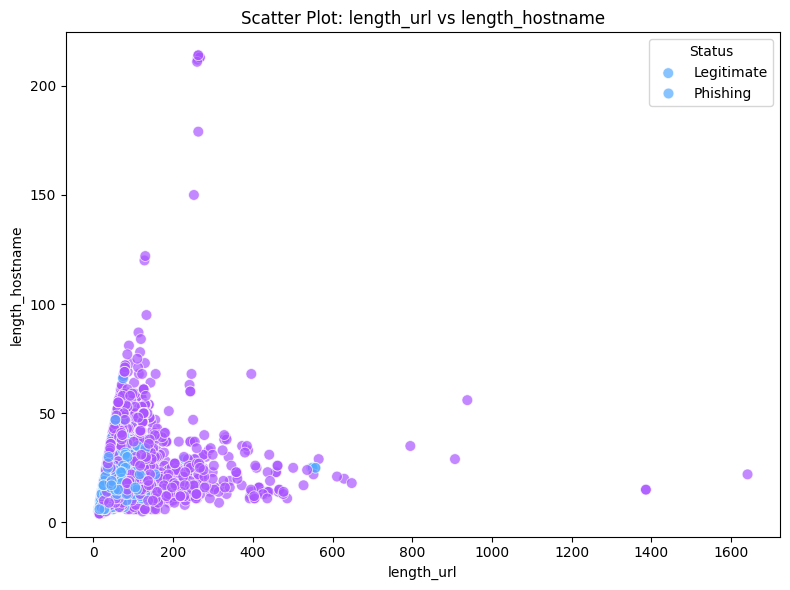

In [ ]:
# Select two features for scatter plot (change these as appropriate for your dataset)
feature_x = X.columns[0]
feature_y = X.columns[1]

# Combine features and target for plotting
df_plot = pd.concat([X[[feature_x, feature_y]], y], axis=1)

# Scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_plot, x=feature_x, y=feature_y, hue='status', palette='cool', s=60, alpha=0.7)
plt.title(f'Scatter Plot: {feature_x} vs {feature_y}')
plt.legend(title='Status', labels=['Legitimate', 'Phishing'])
plt.tight_layout()
plt.show()


In [ ]:
import joblib

# Save the trained model to a file
joblib.dump(model, 'random_forest_phishing_model(websites).joblib')


['random_forest_phishing_model(websites).joblib']

In [ ]:
files.download("random_forest_phishing_model(websites).joblib")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>